# Explore Image Augmentation 


In [1]:
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def get_image(file_name):
    
    """Get Image"""
    
    image = cv2.imread('{}'.format(file_name))
    gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return(gray_scale)

if __name__ == '__main__':
    
    fname = '../sources/stadium.png'
    img_original = get_image(fname)

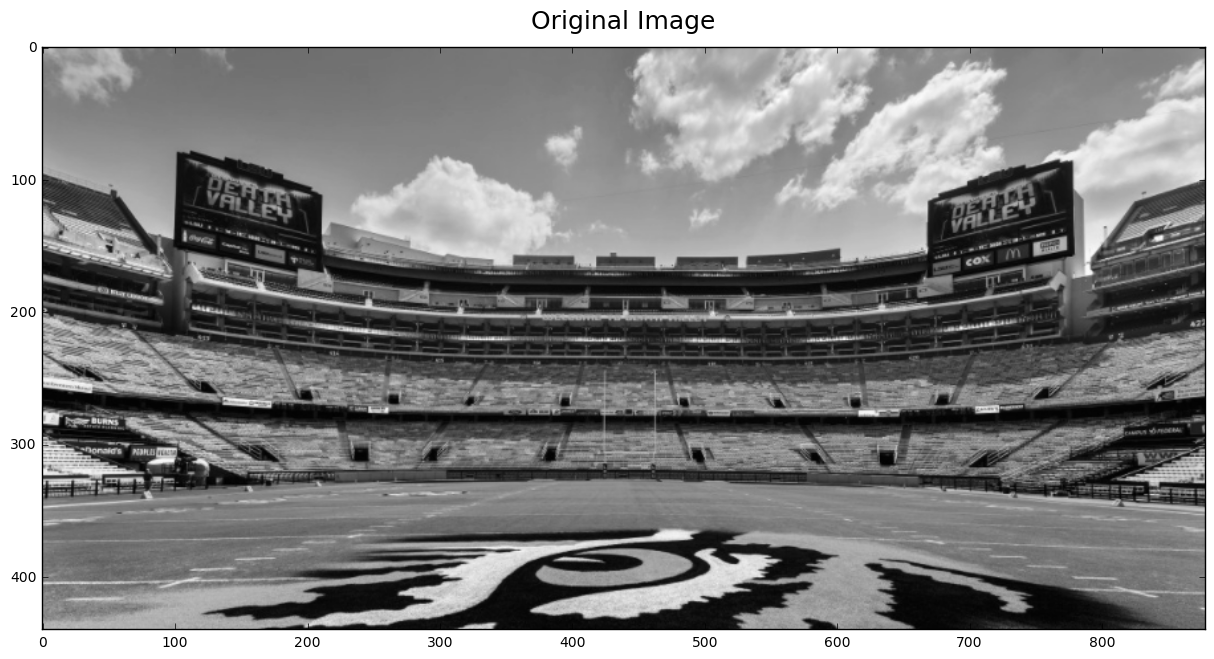

In [5]:
plt.figure(figsize=(15,8))
plt.imshow(img_original,cmap='gray')
plt.title('Original Image',fontsize=18,y=1.02)

In [174]:
def convolve(image, kernel):
    
    """ Convolution Filter"""

    #Get Dimensions of Image (Height and Width)
    (iH, iW) = image.shape[:2]
    
    #Get Dimensions of Kernel (Height and Width)
    (kH, kW) = kernel.shape[:2]
    
    #Kernel is odd value -- compute padding width
    pad = int((kW - 1) / 2)
    
    #Replicate Borders
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    
    #Setup Empty image shape
    output = np.zeros((iH, iW), dtype="float32")
    
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            r = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            k = (r * kernel).sum()
            output[y - pad, x - pad] = k
        
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")
    return output

def get_visualization(original,filt):
    
    """ Return Contrast Visualization between original and filter image """
    
    fig = plt.figure(figsize=(12,8))
    layout =(1,2)
    
    ax_orig = plt.subplot2grid(layout,(0,0))
    ax_filt = plt.subplot2grid(layout,(0,1))
    
    ax_orig.imshow(original,cmap='gray')
    ax_filt.imshow(filt,cmap='gray')
    
    ax_orig.set_title('Original Filter',fontsize=16,y=1.02)
    ax_filt.set_title('Convolution Filter',fontsize=16,y=1.02)

### Blurr Image

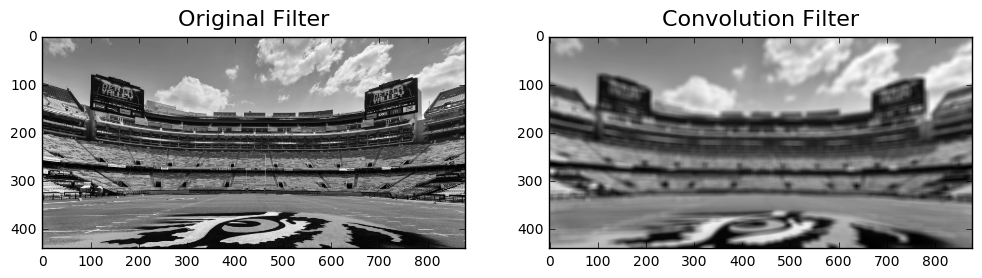

In [181]:
def blurr_filterl(size=11):
    
    """
    Filter to Blurr Image -- Note: The larger the kernel size is. the more the image will be blurred
    """
    
    f = np.ones((size,size),dtype="float") * (1.0 / (size*size))
    return(f)

#Blur Filter
f= blurr_filter()
    
img_blurr = convolve(img_original,f)
get_visualization(img_original,img_blurr)

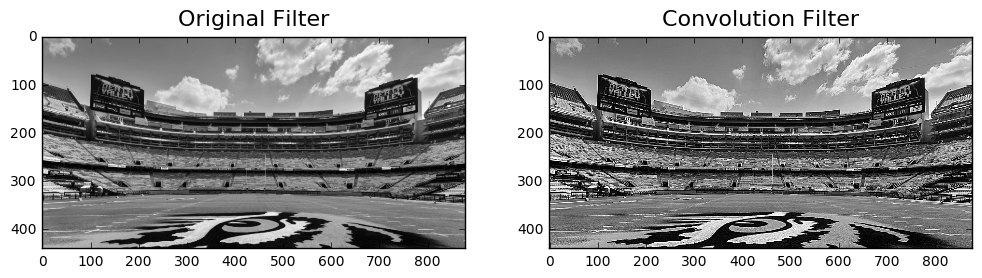

In [186]:
def sharpen_filter(size=11):
    
    """
    Filter to Sharpen Image -- Note: The larger the kernel size is. the more the image will be blurred
    """
    
    f = np.array((
                        [0, -1, 0],
                        [-1, 5, -1],
                        [0, -1, 0]), dtype="int")
    return(f)

#Sharpen Filter
f= sharpen_filter()
    
img_sharp = convolve(img_original,f)
get_visualization(img_original,img_sharp)

### Using CV2 Convolutional Filter w/ Laplacian Kernel 

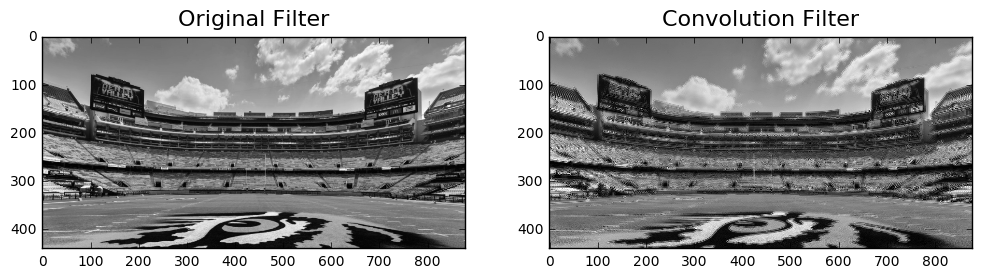

In [201]:
kernel = np.array((
                [0, 1, 0],
                [1, -3, 1],
                [0, 1, 0]), dtype="int")

img_k = cv2.filter2D(img_original, -1, kernel)
get_visualization(img_original,img_k)